In [1]:
import os
import ROOT
from pyroot_cms_scripts import CMS_style, CMS_text

Welcome to JupyROOT 6.18/00


In [2]:
set_defaults = """
mc_hist_filename = "hists/dy_madgraph_20_mc_2017full.root"
data_hist_filename = "hists/double_muon_data_2017full.root"
variable = "Z_mass"
units = "GeV"
title_x = "m_{Z}"
title_y = ""
show_bw = True
axis_max_digits = 4
leg_pos_x1 = 0.70
leg_pos_y1 = 0.70
leg_pos_x2 = 0.90
leg_pos_y2 = 0.90
leg_text_size = 0.04

log_y = False

draw_with_ratio = True
lower_graph_max_y = 1.5
lower_graph_min_y = 0.7

draw_types = True
draw_binned = False
draw_pt_binned = False
eta_bin = "Eta0p0To2p5"
pt_bin = "Pt20To30"

scale_mc = True

save_canvas = True
save_dir = "plots_madgraph"
"""

plot_mc_data = """
if units != "":
    title_x = f"{title_x} ({units})"

if title_y == "":
    title_y = "Events"

ROOT.TGaxis().SetMaxDigits(axis_max_digits)
CMS_style.SetLabelSize(0.04, "XY")
CMS_style.cd()
ROOT.gROOT.ForceStyle()

mc_hist_file = ROOT.TFile.Open(mc_hist_filename)
data_hist_file = ROOT.TFile.Open(data_hist_filename)

legend = ROOT.TLegend(leg_pos_x1, leg_pos_y1, leg_pos_x2, leg_pos_y2)
legend.SetFillStyle(0)
legend.SetBorderSize(0)
legend.SetTextFont(42)
legend.SetTextSize(leg_text_size)

if not draw_binned:
    h_data = data_hist_file.Get(f"data_{variable}")
    h_mc = mc_hist_file.Get(f"mc_{variable}")
    
    if draw_types:
        h_data = (
            data_hist_file.Get(f"data_{variable}_Eta0p0To2p5")
            + data_hist_file.Get(f"data_{variable}_Eta2p5To2p75")
            + data_hist_file.Get(f"data_{variable}_Eta2p75To3p0")
            + data_hist_file.Get(f"data_{variable}_Eta3p0To5p0")
        )

        h_mc = (
            mc_hist_file.Get(f"mc_{variable}_Eta0p0To2p5_all")
            + mc_hist_file.Get(f"mc_{variable}_Eta2p5To2p75_all")
            + mc_hist_file.Get(f"mc_{variable}_Eta2p75To3p0_all")
            + mc_hist_file.Get(f"mc_{variable}_Eta3p0To5p0_all")
        )
        h_prompt = (
            mc_hist_file.Get(f"mc_{variable}_Eta0p0To2p5_prompt")
            + mc_hist_file.Get(f"mc_{variable}_Eta2p5To2p75_prompt")
            + mc_hist_file.Get(f"mc_{variable}_Eta2p75To3p0_prompt")
            + mc_hist_file.Get(f"mc_{variable}_Eta3p0To5p0_prompt")
        )

        h_pileup = (
            mc_hist_file.Get(f"mc_{variable}_Eta0p0To2p5_pileup")
            + mc_hist_file.Get(f"mc_{variable}_Eta2p5To2p75_pileup")
            + mc_hist_file.Get(f"mc_{variable}_Eta2p75To3p0_pileup")
            + mc_hist_file.Get(f"mc_{variable}_Eta3p0To5p0_pileup")
        )
        
        h_rest = (
            mc_hist_file.Get(f"mc_{variable}_Eta0p0To2p5_rest")
            + mc_hist_file.Get(f"mc_{variable}_Eta2p5To2p75_rest")
            + mc_hist_file.Get(f"mc_{variable}_Eta2p75To3p0_rest")
            + mc_hist_file.Get(f"mc_{variable}_Eta3p0To5p0_rest")
        )
        
        if draw_pt_binned:
            h_data = (
                data_hist_file.Get(f"data_{variable}_Eta0p0To2p5_{pt_bin}")
                + data_hist_file.Get(f"data_{variable}_Eta2p5To2p75_{pt_bin}")
                + data_hist_file.Get(f"data_{variable}_Eta2p75To3p0_{pt_bin}")
                + data_hist_file.Get(f"data_{variable}_Eta3p0To5p0_{pt_bin}")
            )
            h_mc = (
                mc_hist_file.Get(f"mc_{variable}_Eta0p0To2p5_{pt_bin}_all")
                + mc_hist_file.Get(f"mc_{variable}_Eta2p5To2p75_{pt_bin}_all")
                + mc_hist_file.Get(f"mc_{variable}_Eta2p75To3p0_{pt_bin}_all")
                + mc_hist_file.Get(f"mc_{variable}_Eta3p0To5p0_{pt_bin}_all")
            )
            h_prompt = (
                mc_hist_file.Get(f"mc_{variable}_Eta0p0To2p5_{pt_bin}_prompt")
                + mc_hist_file.Get(f"mc_{variable}_Eta2p5To2p75_{pt_bin}_prompt")
                + mc_hist_file.Get(f"mc_{variable}_Eta2p75To3p0_{pt_bin}_prompt")
                + mc_hist_file.Get(f"mc_{variable}_Eta3p0To5p0_{pt_bin}_prompt")
            )
            h_pileup = (
                mc_hist_file.Get(f"mc_{variable}_Eta0p0To2p5_{pt_bin}_pileup")
                + mc_hist_file.Get(f"mc_{variable}_Eta2p5To2p75_{pt_bin}_pileup")
                + mc_hist_file.Get(f"mc_{variable}_Eta2p75To3p0_{pt_bin}_pileup")
                + mc_hist_file.Get(f"mc_{variable}_Eta3p0To5p0_{pt_bin}_pileup")
            )

            h_rest = (
                mc_hist_file.Get(f"mc_{variable}_Eta0p0To2p5_{pt_bin}_rest")
                + mc_hist_file.Get(f"mc_{variable}_Eta2p5To2p75_{pt_bin}_rest")
                + mc_hist_file.Get(f"mc_{variable}_Eta2p75To3p0_{pt_bin}_rest")
                + mc_hist_file.Get(f"mc_{variable}_Eta3p0To5p0_{pt_bin}_rest")
            )
            
            legend.AddEntry("", f"{pt_bin.replace('Pt', '').replace('To', ' < pt < ')}", "")
        
        h_prompt.SetLineColor(ROOT.kGreen + 3)
        h_pileup.SetLineColor(ROOT.kPink - 3)
        h_rest.SetLineColor(ROOT.kOrange + 1)
        
        legend.AddEntry(h_prompt, "Prompt", "f")
        legend.AddEntry(h_pileup, "Pileup", "f")
        legend.AddEntry(h_rest, "Rest", "f")

    mc_diff = h_data.Integral() / h_mc.Integral()
    
    if scale_mc:
        h_mc.Scale(mc_diff)
        if draw_types:
            h_prompt.Scale(mc_diff)
            h_pileup.Scale(mc_diff)
            h_rest.Scale(mc_diff)
    

if draw_binned:
    
    legend.SetHeader(f"{eta_bin.replace('Eta', '').replace('p', '.').replace('To', ' < |#eta| < ')}")
    
    if draw_pt_binned:
        legend.AddEntry("", f"{pt_bin.replace('Pt', '').replace('To', ' < pt < ')}", "")
        h_data = data_hist_file.Get(f"data_{variable}_{eta_bin}_{pt_bin}")
        h_mc = mc_hist_file.Get(f"mc_{variable}_{eta_bin}_{pt_bin}_all")
        h_prompt = mc_hist_file.Get(f"mc_{variable}_{eta_bin}_{pt_bin}_prompt")
        h_pileup = mc_hist_file.Get(f"mc_{variable}_{eta_bin}_{pt_bin}_pileup")
        h_rest = mc_hist_file.Get(f"mc_{variable}_{eta_bin}_{pt_bin}_rest")
    
    else:
        h_data = data_hist_file.Get(f"data_{variable}_{eta_bin}")
        h_mc = mc_hist_file.Get(f"mc_{variable}_{eta_bin}_all")
        h_prompt = mc_hist_file.Get(f"mc_{variable}_{eta_bin}_prompt")
        h_pileup = mc_hist_file.Get(f"mc_{variable}_{eta_bin}_pileup")
        h_rest = mc_hist_file.Get(f"mc_{variable}_{eta_bin}_rest")
        
    mc_diff = h_data.Integral() / h_mc.Integral()
    
    if scale_mc:
        h_mc.Scale(mc_diff)
        h_prompt.Scale(mc_diff)
        h_pileup.Scale(mc_diff)
        h_rest.Scale(mc_diff)
            
    h_prompt.SetLineColor(ROOT.kGreen + 3)
    h_pileup.SetLineColor(ROOT.kPink - 3)
    h_rest.SetLineColor(ROOT.kOrange + 1)
    
    legend.AddEntry(h_prompt, "Prompt", "f")
    legend.AddEntry(h_pileup, "Pileup", "f")
    legend.AddEntry(h_rest, "Rest", "f")


h_mc.SetLineColor(ROOT.kBlue + 1)
legend.AddEntry(h_mc, "MC (All)", "f")

h_data.SetMarkerStyle(20)
h_data.SetMarkerColor(ROOT.kBlack)
legend.AddEntry(h_data, "Data", "pe")

if scale_mc:
    legend.AddEntry("", f"MC_{{sf}} {mc_diff:.2f}", "")

bw = h_data.GetBinWidth(1)

if show_bw:
    title_y = f"{title_y} / {bw} {units}"

h_data.SetTitle(f";{title_x};{title_y}")
h_mc.SetTitle(f";{title_x};{title_y}")

maxY = max(h_data.GetMaximum(), h_mc.GetMaximum())
minY = min(h_data.GetMinimum(), h_mc.GetMinimum())
    
if minY == 0.0:
    minY = 0.01

h_mc.SetMaximum(maxY * 1.15)
h_data.SetMaximum(maxY * 1.15)

h_mc.SetStats(0)
h_data.SetStats(0)

# ------------------
canvas = ROOT.TCanvas()

if log_y:
    canvas.SetLogy()

if not draw_with_ratio:
    h_mc.Draw("hist")
    h_data.Draw("x0 e1 same")

    legend.Draw()

if draw_with_ratio:

    left_margin = canvas.GetLeftMargin()
    right_margin = canvas.GetRightMargin()

    ratio = ROOT.TRatioPlot(h_data, h_mc)

    ratio.SetH1DrawOpt("x0 e1")
    ratio.SetH2DrawOpt("hist")
    ratio.SetGraphDrawOpt("PZ")

    ratio.SetSeparationMargin(0.0)
    ratio.SetLeftMargin(canvas.GetLeftMargin())
    ratio.SetRightMargin(canvas.GetRightMargin())
    ratio.SetUpTopMargin(0.075)
    ratio.SetLowBottomMargin(0.40)

    ratio.Draw("grid hideup")

    graph_ref = ratio.GetLowerRefGraph()
    graph_ref.SetMarkerStyle(7)
    graph_ref.SetMaximum(lower_graph_max_y)
    graph_ref.SetMinimum(lower_graph_min_y)

    ratio.GetLowYaxis().SetNdivisions(502)

    upper_pad = ratio.GetUpperPad()
    upper_pad.cd()

    if draw_binned or draw_types:
        h_prompt.Draw("hist same")
        h_pileup.Draw("hist same")
        h_rest.Draw("hist same")

    legend.Draw()

canvas.Draw()
if save_canvas:
    os.makedirs(f"{save_dir}", exist_ok=True)
    
    if draw_binned and not draw_pt_binned:
        canvas.SaveAs(f"{save_dir}/{variable}_{eta_bin}.pdf")

    elif draw_types and draw_pt_binned:
        canvas.SaveAs(f"{save_dir}/{variable}_{pt_bin}.pdf")

    elif draw_binned and draw_pt_binned:
        canvas.SaveAs(f"{save_dir}/{variable}_{eta_bin}_{pt_bin}.pdf")

    else:
        canvas.SaveAs(f"{save_dir}/{variable}.pdf")
"""

Error in <TLegend::AddEntry>: need to create a canvas first
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 1 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/nvtx.pdf has been created


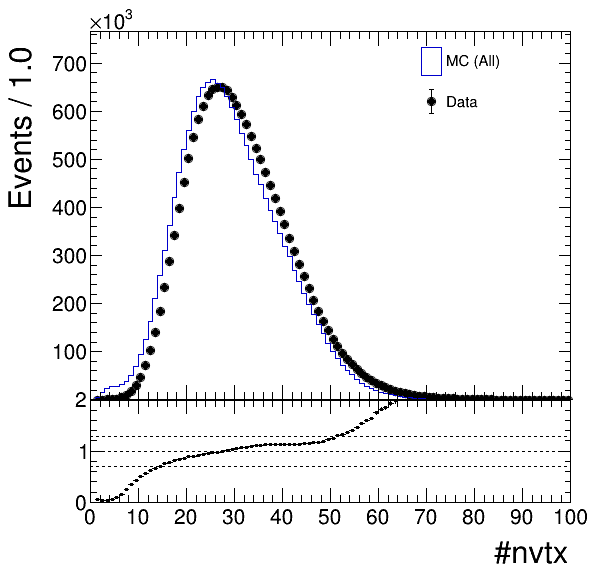

In [3]:
exec(set_defaults)
variable = "nvtx"
units = ""
title_x = "#nvtx"
title_y = ""
lower_graph_max_y = 2.0
lower_graph_min_y = 0.0
draw_types = False
exec(plot_mc_data)

Info in <TCanvas::Print>: pdf file plots_madgraph/Z_mass.pdf has been created


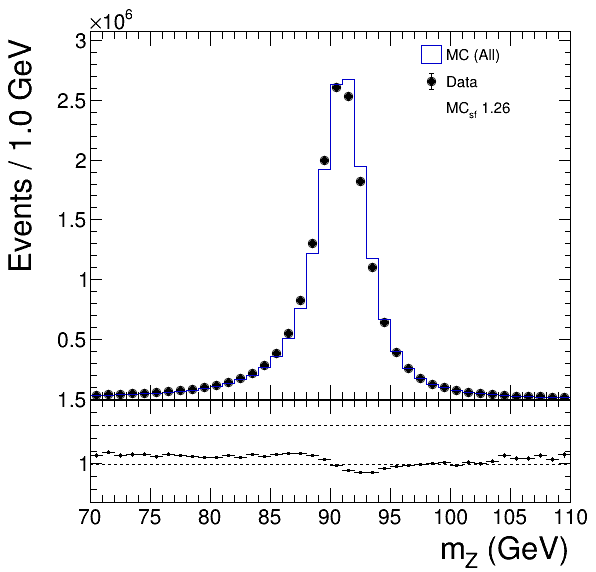

In [4]:
exec(set_defaults)
draw_types = False
exec(plot_mc_data)

Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 4 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/lept_pt1.pdf has been created


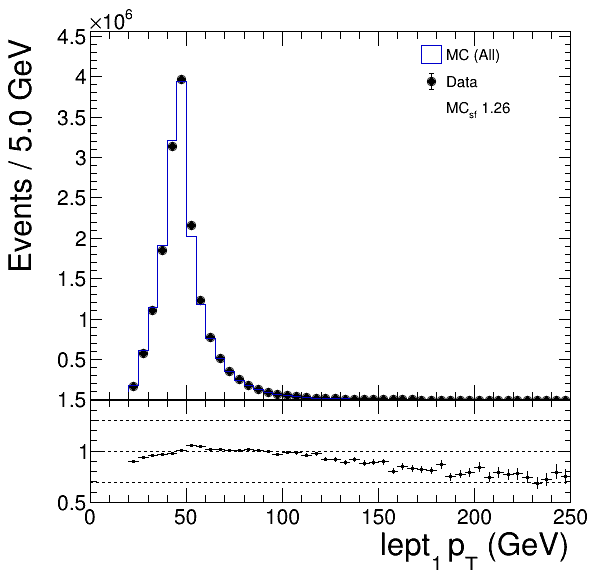

In [5]:
exec(set_defaults)
draw_types = False
variable = "lept_pt1"
units = "GeV"
title_x = "lept_{1} p_{T}"
title_y = ""
lower_graph_min_y = 0.5
exec(plot_mc_data)

Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 4 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/lept_pt2.pdf has been created


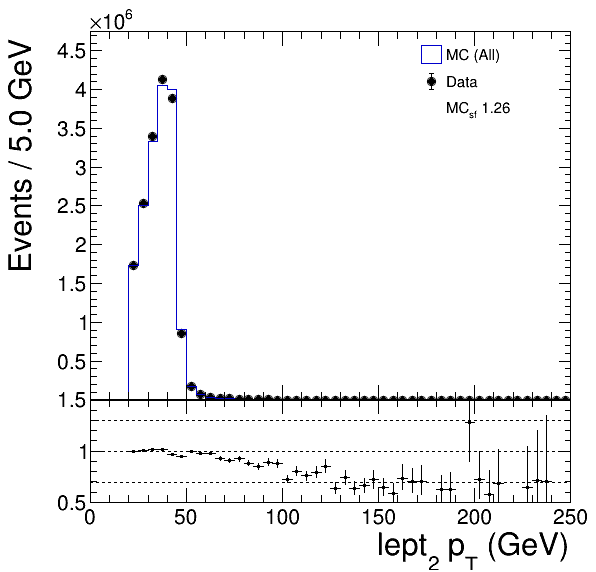

In [6]:
exec(set_defaults)
draw_types = False
variable = "lept_pt2"
units = "GeV"
title_x = "lept_{2} p_{T}"
title_y = ""
lower_graph_min_y = 0.5
exec(plot_mc_data)

Info in <TCanvas::Print>: pdf file plots_madgraph/Z_pt.pdf has been created


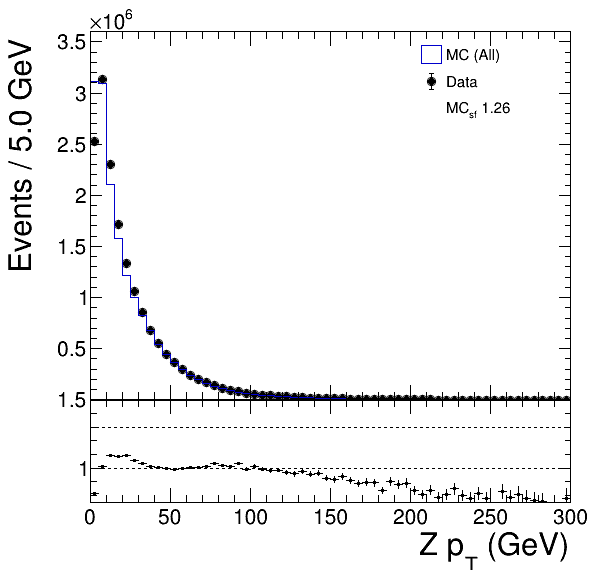

In [7]:
exec(set_defaults)
draw_types = False
variable = "Z_pt"
units = "GeV"
title_x = "Z p_{T}"
title_y = ""
lower_graph_min_y = 0.75
exec(plot_mc_data)

Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 20 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/jet_pt_Eta0p0To2p5.pdf has been created


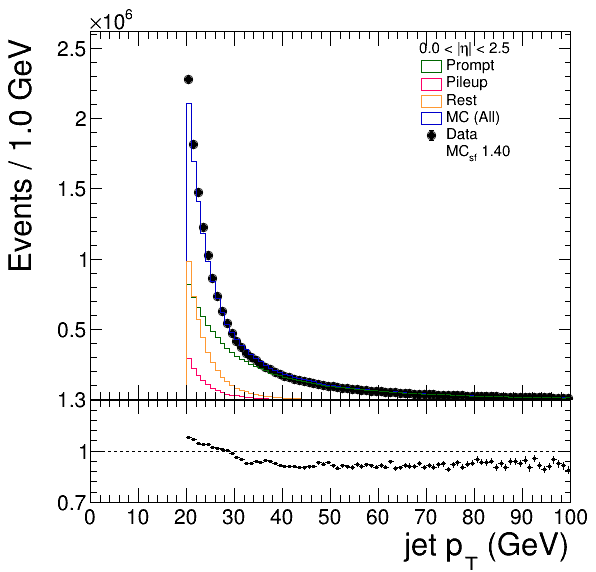

In [8]:
exec(set_defaults)
variable = "jet_pt"
units = "GeV"
title_x = "jet p_{T}"
title_y = ""
lower_graph_max_y = 1.3
lower_graph_min_y = 0.7
leg_pos_y1 = 0.6
draw_type = True
draw_pt_binned = False
draw_binned = True
eta_bin = "Eta0p0To2p5"
exec(plot_mc_data)

Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 20 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/jet_pt_Eta2p5To2p75.pdf has been created


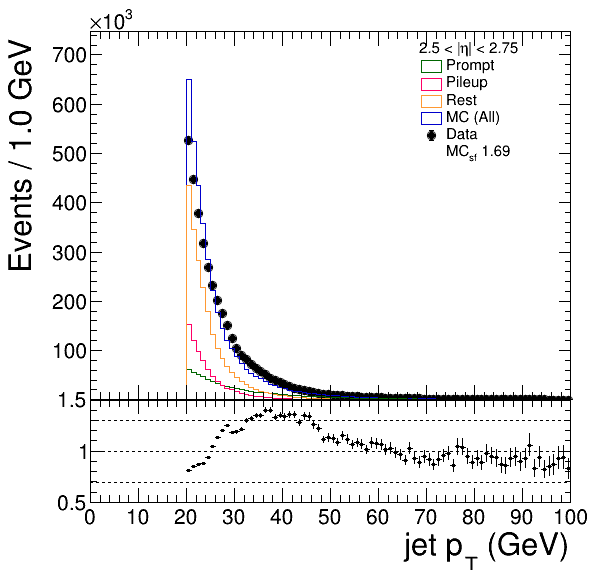

In [9]:
exec(set_defaults)
variable = "jet_pt"
units = "GeV"
title_x = "jet p_{T}"
title_y = ""
lower_graph_max_y = 1.5
lower_graph_min_y = 0.5
leg_pos_y1 = 0.6
draw_type = True
draw_pt_binned = False
draw_binned = True
eta_bin = "Eta2p5To2p75"
exec(plot_mc_data)

Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 20 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/jet_pt_Eta2p75To3p0.pdf has been created


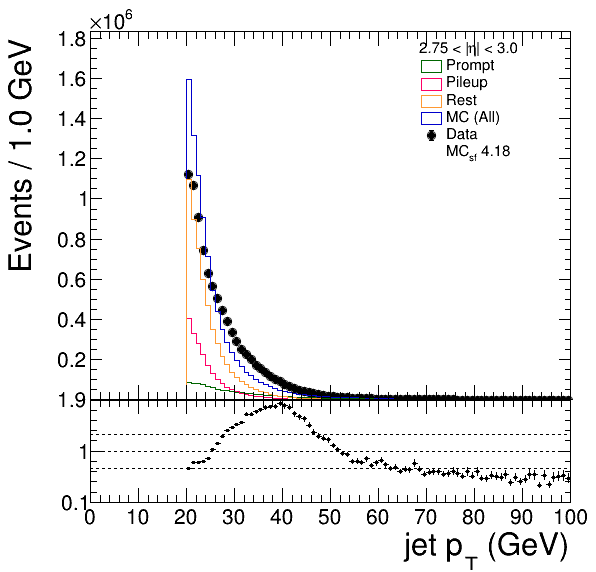

In [10]:
exec(set_defaults)
variable = "jet_pt"
units = "GeV"
title_x = "jet p_{T}"
title_y = ""
lower_graph_max_y = 1.9
lower_graph_min_y = 0.1
leg_pos_y1 = 0.6
draw_type = True
draw_pt_binned = False
draw_binned = True
eta_bin = "Eta2p75To3p0"
exec(plot_mc_data)

Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 20 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/jet_pt_Eta3p0To5p0.pdf has been created


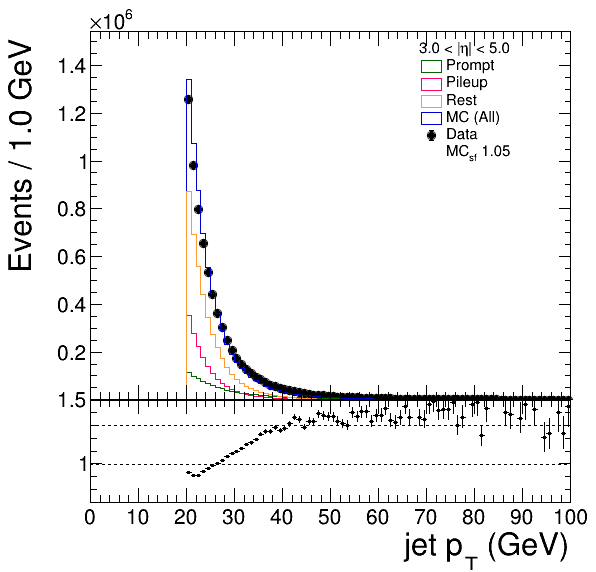

In [11]:
exec(set_defaults)
variable = "jet_pt"
units = "GeV"
title_x = "jet p_{T}"
title_y = ""
lower_graph_max_y = 1.5
lower_graph_min_y = 0.7
leg_pos_y1 = 0.6
draw_type = True
draw_pt_binned = False
draw_binned = True
eta_bin = "Eta3p0To5p0"
exec(plot_mc_data)

Info in <TCanvas::Print>: pdf file plots_madgraph/jet_eta_Pt20To30.pdf has been created


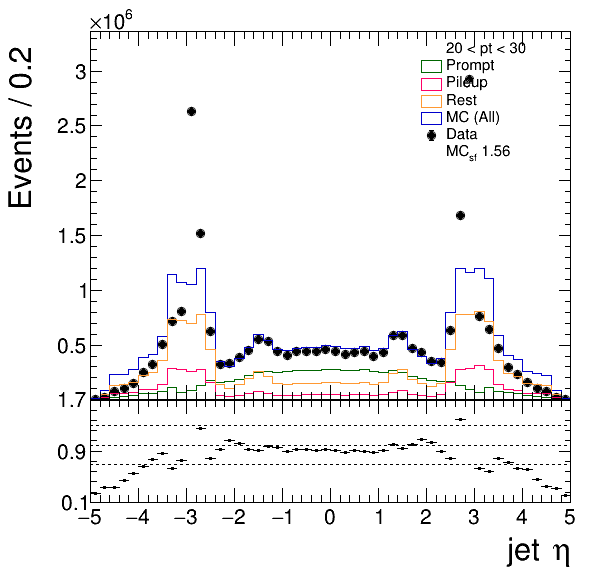

In [12]:
exec(set_defaults)
variable = "jet_eta"
units = ""
title_x = "jet #eta"
title_y = ""
lower_graph_max_y = 1.7
lower_graph_min_y = 0.1
leg_pos_y1 = 0.6
draw_type = True
draw_pt_binned = True
pt_bin = "Pt20To30"
exec(plot_mc_data)

Info in <TCanvas::Print>: pdf file plots_madgraph/jet_eta_Pt30To40.pdf has been created


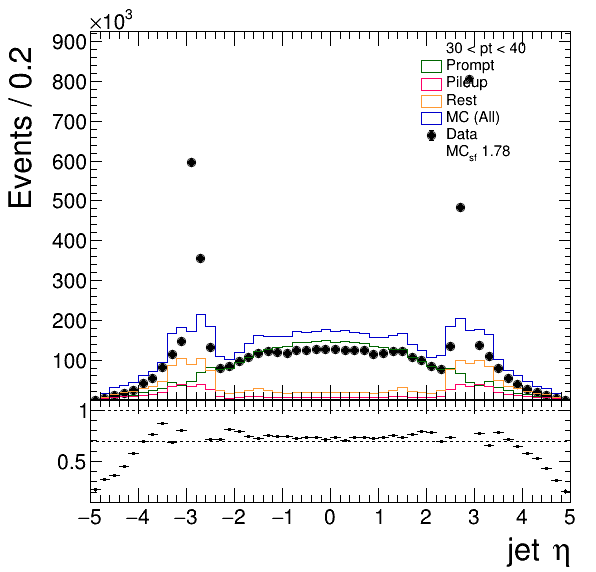

In [13]:
exec(set_defaults)
variable = "jet_eta"
units = ""
title_x = "jet #eta"
title_y = ""
lower_graph_max_y = 1.1
lower_graph_min_y = 0.1
leg_pos_y1 = 0.6
draw_type = True
draw_pt_binned = True
pt_bin = "Pt30To40"
exec(plot_mc_data)

Info in <TCanvas::Print>: pdf file plots_madgraph/jet_eta_Pt40To50.pdf has been created


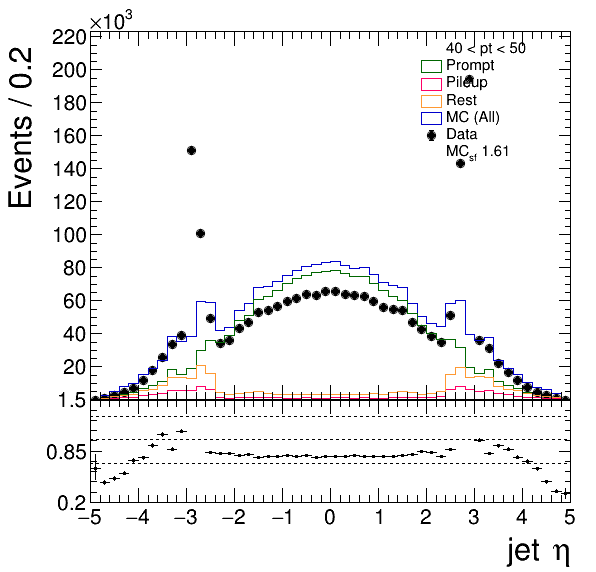

In [14]:
exec(set_defaults)
variable = "jet_eta"
units = ""
title_x = "jet #eta"
title_y = ""
lower_graph_max_y = 1.5
lower_graph_min_y = 0.2
leg_pos_y1 = 0.6
draw_type = True
draw_pt_binned = True
pt_bin = "Pt40To50"
exec(plot_mc_data)

Info in <TCanvas::Print>: pdf file plots_madgraph/jet_eta_Pt50To100.pdf has been created


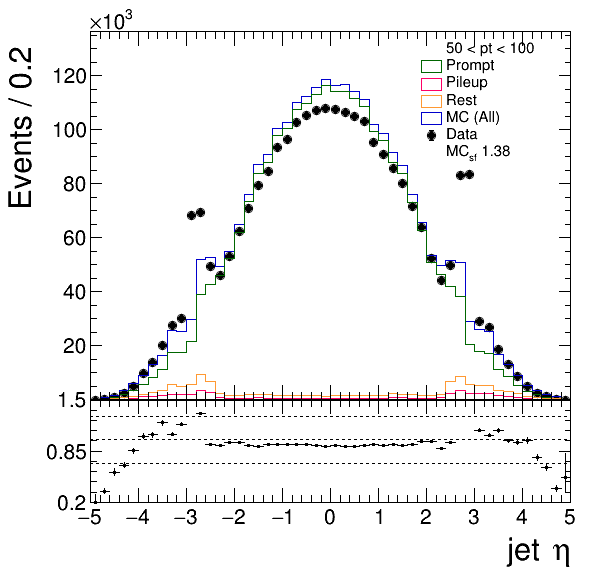

In [15]:
exec(set_defaults)
variable = "jet_eta"
units = ""
title_x = "jet #eta"
title_y = ""
lower_graph_max_y = 1.5
lower_graph_min_y = 0.2
leg_pos_y1 = 0.6
draw_type = True
draw_pt_binned = True
pt_bin = "Pt50To100"
exec(plot_mc_data)

Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 1 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/beta_Eta0p0To2p5_Pt20To30.pdf has been created
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 1 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/beta_Eta2p5To2p75_Pt20To30.pdf has been created
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 1 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/beta_Eta2p75To3p0_Pt20To30.pdf has been created
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 1 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/beta_Eta3p0To5p0_Pt20To30.pdf has been created


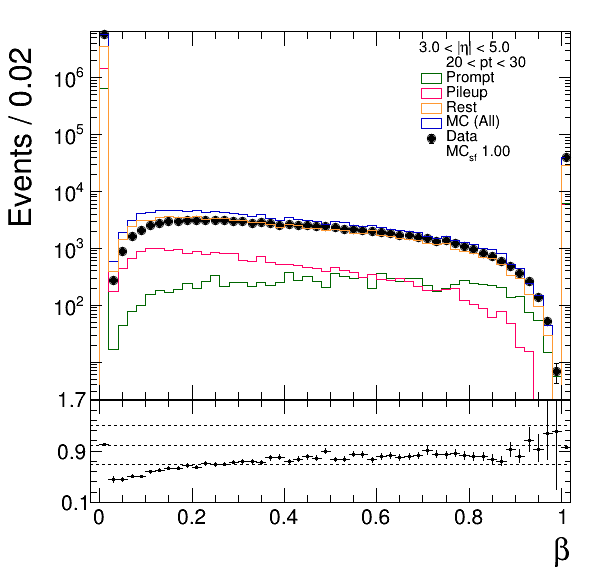

In [16]:
for e in ["Eta0p0To2p5", "Eta2p5To2p75", "Eta2p75To3p0", "Eta3p0To5p0"]:
    exec(set_defaults)
    eta_bin = e
    
    variable = "beta"
    units = ""
    title_x = "#beta"
    title_y = ""
    lower_graph_max_y = 1.7
    lower_graph_min_y = 0.1
    leg_pos_y1 = 0.6
    draw_types = False
    draw_binned = True
    draw_pt_binned = True
    log_y = True

    exec(plot_mc_data)

Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 5 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/dR2Mean_Eta0p0To2p5_Pt20To30.pdf has been created
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 5 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/dR2Mean_Eta2p5To2p75_Pt20To30.pdf has been created
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 9 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/dR2Mean_Eta2p75To3p0_Pt20To30.pdf has been created
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 5 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/dR2Mean_Eta3p0To5p0_Pt20To30.pdf has been created


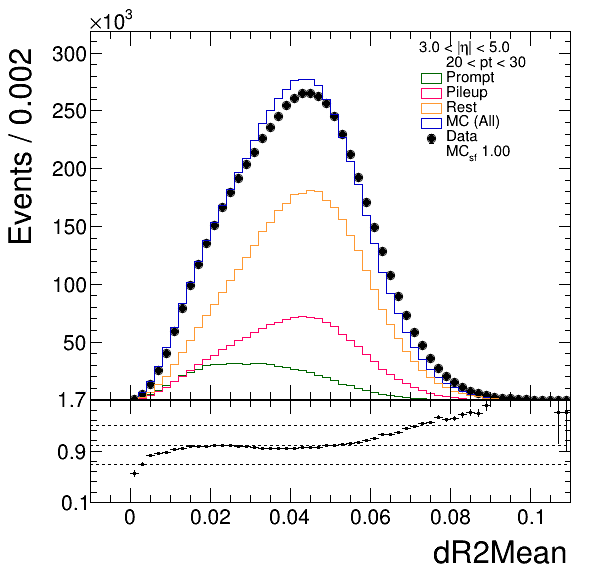

In [17]:
for e in ["Eta0p0To2p5", "Eta2p5To2p75", "Eta2p75To3p0", "Eta3p0To5p0"]:
    exec(set_defaults)
    
    eta_bin = e

    variable = "dR2Mean"
    units = ""
    title_x = "dR2Mean"
    title_y = ""
    lower_graph_max_y = 1.7
    lower_graph_min_y = 0.1
    leg_pos_y1 = 0.6
    draw_types = False
    draw_binned = True
    draw_pt_binned = True
    log_y = False

    exec(plot_mc_data)

Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 1 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/frac01_Eta0p0To2p5_Pt20To30.pdf has been created
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 1 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/frac01_Eta2p5To2p75_Pt20To30.pdf has been created
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 2 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/frac01_Eta2p75To3p0_Pt20To30.pdf has been created
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 9 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/frac01_Eta3p0To5p0_Pt20To30.pdf has been created


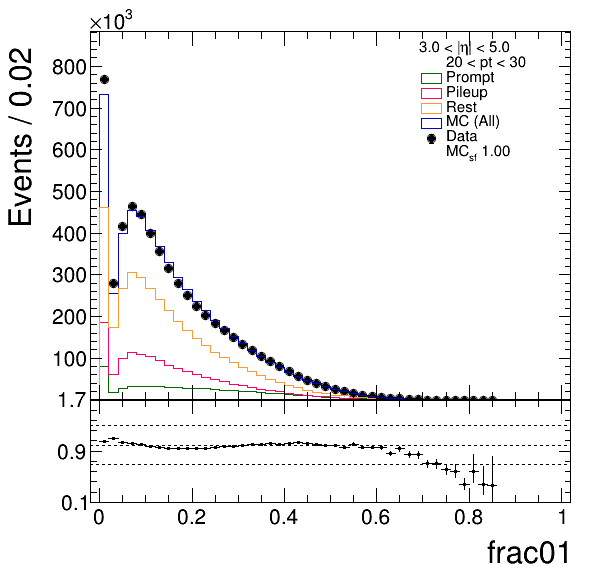

In [18]:
for e in ["Eta0p0To2p5", "Eta2p5To2p75", "Eta2p75To3p0", "Eta3p0To5p0"]:
    exec(set_defaults)

    eta_bin = e

    variable = "frac01"
    units = ""
    title_x = "frac01"
    title_y = ""
    lower_graph_max_y = 1.7
    lower_graph_min_y = 0.1
    leg_pos_y1 = 0.6
    draw_types = False
    draw_binned = True
    draw_pt_binned = True
    log_y = False
    exec(plot_mc_data)

Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 1 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/frac02_Eta0p0To2p5_Pt20To30.pdf has been created
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 1 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/frac02_Eta2p5To2p75_Pt20To30.pdf has been created
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 1 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/frac02_Eta2p75To3p0_Pt20To30.pdf has been created
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 6 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/frac02_Eta3p0To5p0_Pt20To30.pdf has been created


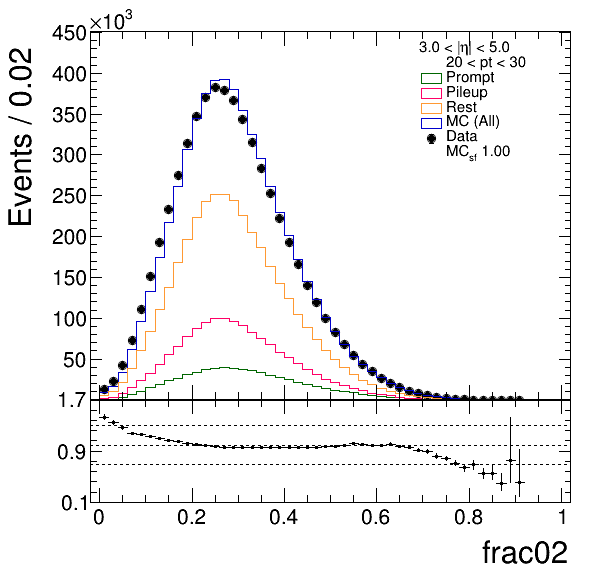

In [19]:
for e in ["Eta0p0To2p5", "Eta2p5To2p75", "Eta2p75To3p0", "Eta3p0To5p0"]:
    exec(set_defaults)

    eta_bin = e

    variable = "frac02"
    units = ""
    title_x = "frac02"
    title_y = ""
    lower_graph_max_y = 1.7
    lower_graph_min_y = 0.1
    leg_pos_y1 = 0.6
    draw_types = False
    draw_binned = True
    draw_pt_binned = True
    log_y = False
    exec(plot_mc_data)

Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 1 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/frac03_Eta0p0To2p5_Pt20To30.pdf has been created
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 2 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/frac03_Eta2p5To2p75_Pt20To30.pdf has been created
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 2 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/frac03_Eta2p75To3p0_Pt20To30.pdf has been created
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 5 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/frac03_Eta3p0To5p0_Pt20To30.pdf has been created


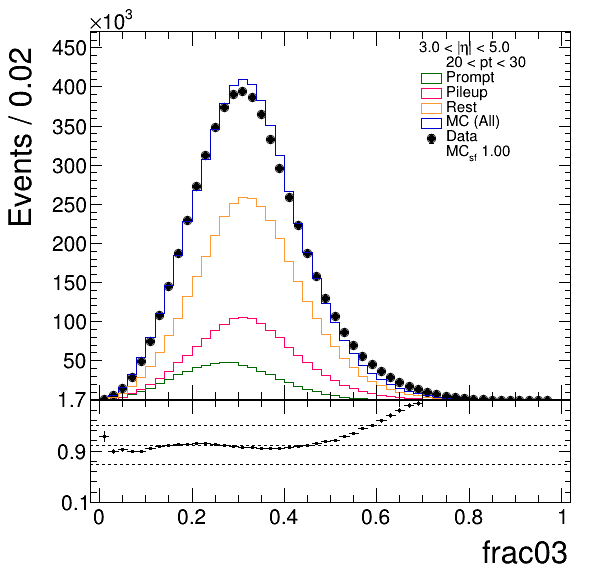

In [20]:
for e in ["Eta0p0To2p5", "Eta2p5To2p75", "Eta2p75To3p0", "Eta3p0To5p0"]:
    exec(set_defaults)

    eta_bin = e

    variable = "frac03"
    units = ""
    title_x = "frac03"
    title_y = ""
    lower_graph_max_y = 1.7
    lower_graph_min_y = 0.1
    leg_pos_y1 = 0.6
    draw_types = False
    draw_binned = True
    draw_pt_binned = True
    log_y = False
    exec(plot_mc_data)

Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 17 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/frac04_Eta0p0To2p5_Pt20To30.pdf has been created
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 21 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/frac04_Eta2p5To2p75_Pt20To30.pdf has been created
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 18 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/frac04_Eta2p75To3p0_Pt20To30.pdf has been created
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 17 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/frac04_Eta3p0To5p0_Pt20To30.pdf has been created


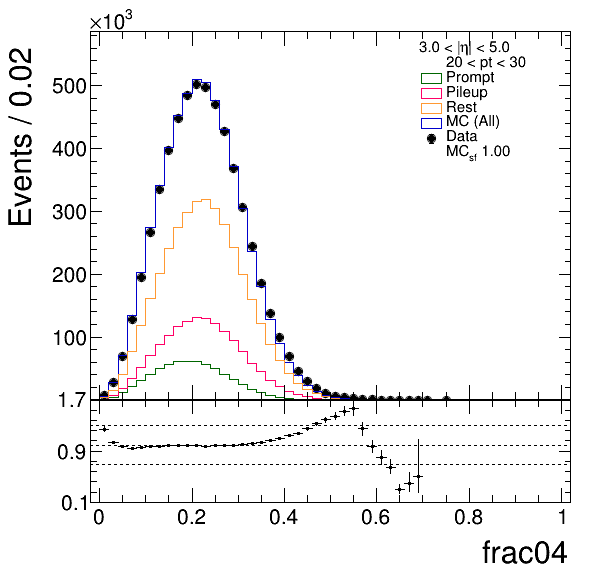

In [21]:
for e in ["Eta0p0To2p5", "Eta2p5To2p75", "Eta2p75To3p0", "Eta3p0To5p0"]:
    exec(set_defaults)

    eta_bin = e

    variable = "frac04"
    units = ""
    title_x = "frac04"
    title_y = ""
    lower_graph_max_y = 1.7
    lower_graph_min_y = 0.1
    leg_pos_y1 = 0.6
    draw_types = False
    draw_binned = True
    draw_pt_binned = True
    log_y = False
    exec(plot_mc_data)

Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 4 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/jetR_Eta0p0To2p5_Pt20To30.pdf has been created
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 5 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/jetR_Eta2p5To2p75_Pt20To30.pdf has been created
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 5 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/jetR_Eta2p75To3p0_Pt20To30.pdf has been created
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 14 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/jetR_Eta3p0To5p0_Pt20To30.pdf has been created


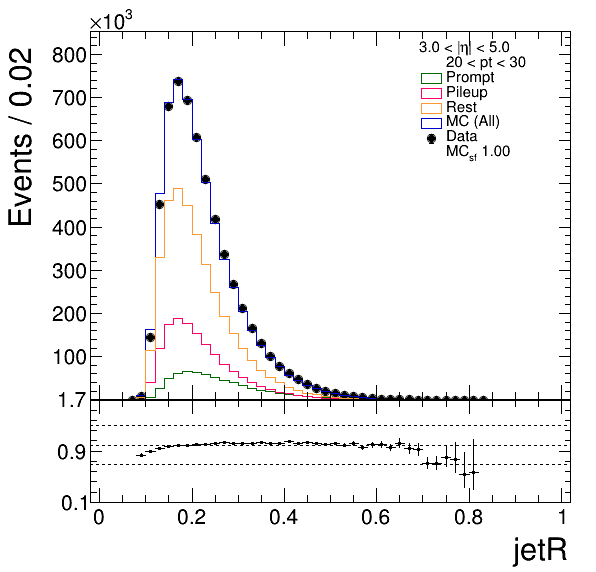

In [22]:
for e in ["Eta0p0To2p5", "Eta2p5To2p75", "Eta2p75To3p0", "Eta3p0To5p0"]:
    exec(set_defaults)

    eta_bin = e

    variable = "jetR"
    units = ""
    title_x = "jetR"
    title_y = ""
    lower_graph_max_y = 1.7
    lower_graph_min_y = 0.1
    leg_pos_y1 = 0.6
    draw_types = False
    draw_binned = True
    draw_pt_binned = True
    log_y = False
    exec(plot_mc_data)

Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 2 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/jetRchg_Eta0p0To2p5_Pt20To30.pdf has been created
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 3 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/jetRchg_Eta2p5To2p75_Pt20To30.pdf has been created
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 6 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/jetRchg_Eta2p75To3p0_Pt20To30.pdf has been created
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 15 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/jetRchg_Eta3p0To5p0_Pt20To30.pdf has been created


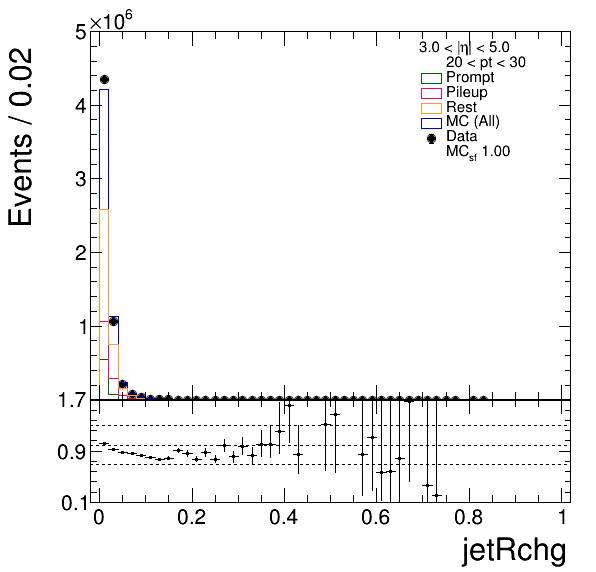

In [23]:
for e in ["Eta0p0To2p5", "Eta2p5To2p75", "Eta2p75To3p0", "Eta3p0To5p0"]:
    exec(set_defaults)

    eta_bin = e

    variable = "jetRchg"
    units = ""
    title_x = "jetRchg"
    title_y = ""
    lower_graph_max_y = 1.7
    lower_graph_min_y = 0.1
    leg_pos_y1 = 0.6
    draw_types = False
    draw_binned = True
    draw_pt_binned = True
    log_y = False
    exec(plot_mc_data)

Info in <TCanvas::Print>: pdf file plots_madgraph/majW_Eta0p0To2p5_Pt20To30.pdf has been created
Info in <TCanvas::Print>: pdf file plots_madgraph/majW_Eta2p5To2p75_Pt20To30.pdf has been created
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 1 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/majW_Eta2p75To3p0_Pt20To30.pdf has been created
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 3 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/majW_Eta3p0To5p0_Pt20To30.pdf has been created


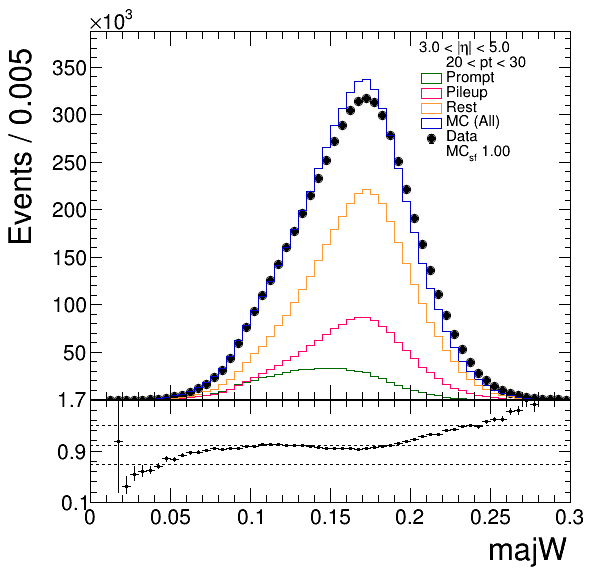

In [24]:
for e in ["Eta0p0To2p5", "Eta2p5To2p75", "Eta2p75To3p0", "Eta3p0To5p0"]:
    exec(set_defaults)

    eta_bin = e

    variable = "majW"
    units = ""
    title_x = "majW"
    title_y = ""
    lower_graph_max_y = 1.7
    lower_graph_min_y = 0.1
    leg_pos_y1 = 0.6
    draw_types = False
    draw_binned = True
    draw_pt_binned = True
    log_y = False
    exec(plot_mc_data)

Info in <TCanvas::Print>: pdf file plots_madgraph/minW_Eta0p0To2p5_Pt20To30.pdf has been created
Info in <TCanvas::Print>: pdf file plots_madgraph/minW_Eta2p5To2p75_Pt20To30.pdf has been created
Info in <TCanvas::Print>: pdf file plots_madgraph/minW_Eta2p75To3p0_Pt20To30.pdf has been created
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 2 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/minW_Eta3p0To5p0_Pt20To30.pdf has been created


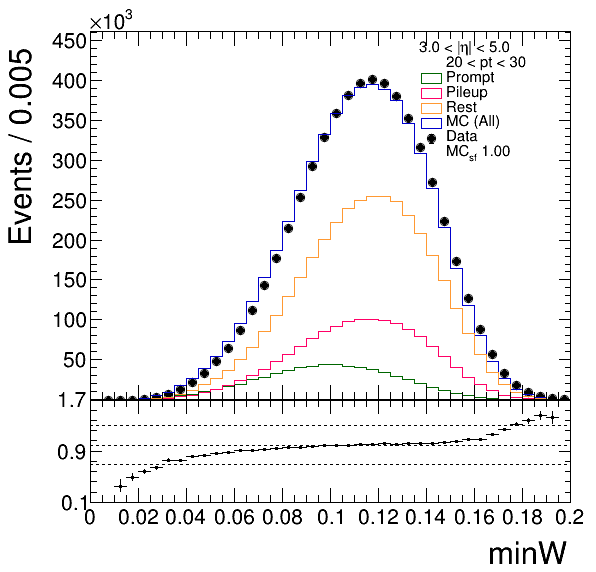

In [25]:
for e in ["Eta0p0To2p5", "Eta2p5To2p75", "Eta2p75To3p0", "Eta3p0To5p0"]:
    
    exec(set_defaults)
    eta_bin = e

    variable = "minW"
    units = ""
    title_x = "minW"
    title_y = ""
    lower_graph_max_y = 1.7
    lower_graph_min_y = 0.1
    leg_pos_y1 = 0.6
    draw_types = False
    draw_binned = True
    draw_pt_binned = True
    log_y = False

    exec(plot_mc_data)

Info in <TCanvas::Print>: pdf file plots_madgraph/nCharged_Eta0p0To2p5_Pt20To30.pdf has been created
Info in <TCanvas::Print>: pdf file plots_madgraph/nCharged_Eta2p5To2p75_Pt20To30.pdf has been created
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 4 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/nCharged_Eta2p75To3p0_Pt20To30.pdf has been created
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 20 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/nCharged_Eta3p0To5p0_Pt20To30.pdf has been created


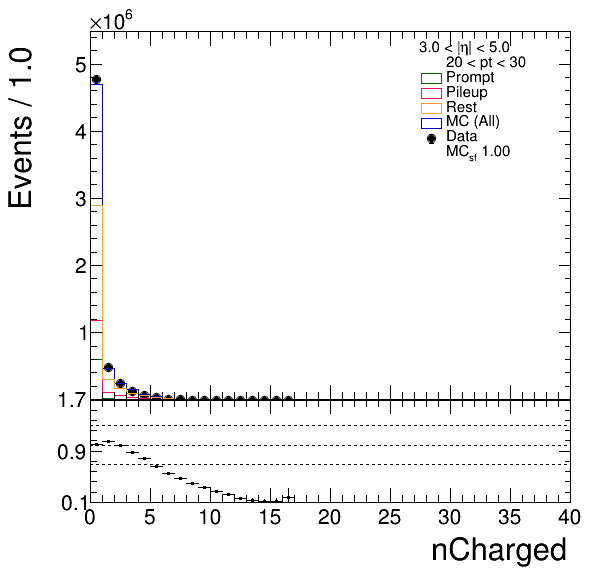

In [26]:
for e in ["Eta0p0To2p5", "Eta2p5To2p75", "Eta2p75To3p0", "Eta3p0To5p0"]:
    
    exec(set_defaults)
    eta_bin = e

    variable = "nCharged"
    units = ""
    title_x = "nCharged"
    title_y = ""
    lower_graph_max_y = 1.7
    lower_graph_min_y = 0.1
    leg_pos_y1 = 0.6
    draw_types = False
    draw_binned = True
    draw_pt_binned = True
    log_y = False

    exec(plot_mc_data)

Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 2 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/nParticles_Eta0p0To2p5_Pt20To30.pdf has been created
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 14 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/nParticles_Eta2p5To2p75_Pt20To30.pdf has been created
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 21 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/nParticles_Eta2p75To3p0_Pt20To30.pdf has been created
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 39 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/nParticles_Eta3p0To5p0_Pt20To30.pdf has been created


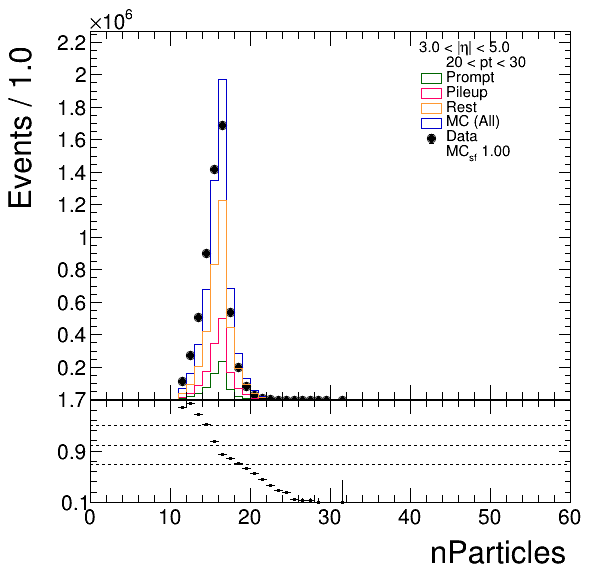

In [27]:
for e in ["Eta0p0To2p5", "Eta2p5To2p75", "Eta2p75To3p0", "Eta3p0To5p0"]:
    
    exec(set_defaults)
    eta_bin = e

    variable = "nParticles"
    units = ""
    title_x = "nParticles"
    title_y = ""
    lower_graph_max_y = 1.7
    lower_graph_min_y = 0.1
    leg_pos_y1 = 0.6
    draw_types = False
    draw_binned = True
    draw_pt_binned = True
    log_y = False

    exec(plot_mc_data)

Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 7 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/ptD_Eta0p0To2p5_Pt20To30.pdf has been created
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 9 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/ptD_Eta2p5To2p75_Pt20To30.pdf has been created
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 9 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/ptD_Eta2p75To3p0_Pt20To30.pdf has been created
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 20 points have been skipped
Info in <TCanvas::Print>: pdf file plots_madgraph/ptD_Eta3p0To5p0_Pt20To30.pdf has been created


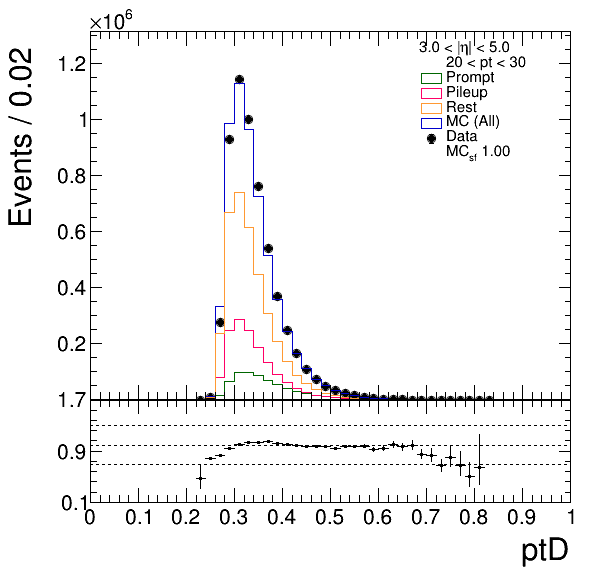

In [28]:
for e in ["Eta0p0To2p5", "Eta2p5To2p75", "Eta2p75To3p0", "Eta3p0To5p0"]:
    
    exec(set_defaults)
    eta_bin = e

    variable = "ptD"
    units = ""
    title_x = "ptD"
    title_y = ""
    lower_graph_max_y = 1.7
    lower_graph_min_y = 0.1
    leg_pos_y1 = 0.6
    draw_types = False
    draw_binned = True
    draw_pt_binned = True
    log_y = False

    exec(plot_mc_data)

Info in <TCanvas::Print>: pdf file plots_madgraph/pull_Eta0p0To2p5_Pt20To30.pdf has been created
Info in <TCanvas::Print>: pdf file plots_madgraph/pull_Eta2p5To2p75_Pt20To30.pdf has been created
Info in <TCanvas::Print>: pdf file plots_madgraph/pull_Eta2p75To3p0_Pt20To30.pdf has been created
Info in <TCanvas::Print>: pdf file plots_madgraph/pull_Eta3p0To5p0_Pt20To30.pdf has been created


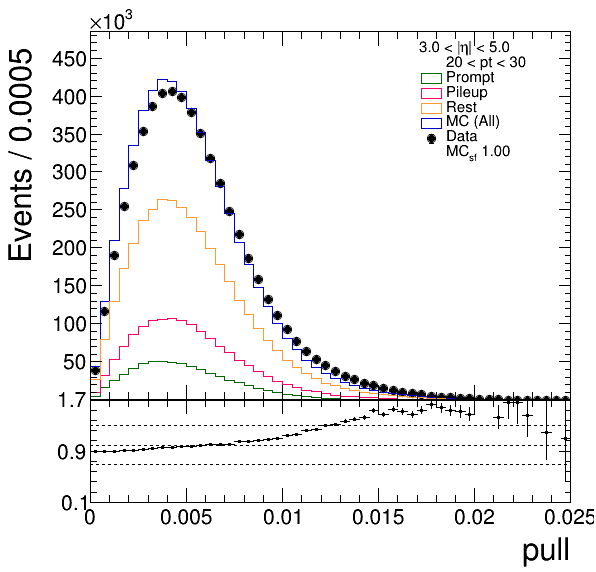

In [29]:
for e in ["Eta0p0To2p5", "Eta2p5To2p75", "Eta2p75To3p0", "Eta3p0To5p0"]:
    
    exec(set_defaults)
    eta_bin = e

    variable = "pull"
    units = ""
    title_x = "pull"
    title_y = ""
    lower_graph_max_y = 1.7
    lower_graph_min_y = 0.1
    leg_pos_y1 = 0.6
    draw_types = False
    draw_binned = True
    draw_pt_binned = True
    log_y = False

    exec(plot_mc_data)